In [44]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
import seaborn as sns
from pydicom import dcmread
%matplotlib inline

In [61]:
%run fxns.ipynb

That's not a nice way to import those functions above -- but whatever

In [9]:
path = Path('/home/azaidi/Desktop/fastai/nbs/kaggle/osic')
Path.BASE_PATH = path
path.ls()

(#6) [Path('test.csv'),Path('train'),Path('train.csv'),Path('test'),Path('osic-pulmonary-fibrosis-progression.zip'),Path('sample_submission.csv')]

In [10]:
train_path = path/'train'
test_path = path/'test'
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
sample_sub = pd.read_csv(path/'sample_submission.csv')

In [11]:
%%time
dcms = [dcm_sort(folder) for folder in train_path.ls()]

CPU times: user 18.7 s, sys: 11.8 s, total: 30.5 s
Wall time: 43 s


In [12]:
len(dcms)

176

In [24]:
resampled_list = []

In [25]:
test_dcms = dcms[0:5]
len(test_dcms)

5

In [26]:
%%time
for patient in test_dcms:
    scan = ct_transformed(patient, threshold=0)
    resampled_scan, _ = resample(scan, patient)
    resampled_list.append(resampled_scan)

CPU times: user 46.1 s, sys: 386 ms, total: 46.5 s
Wall time: 46.5 s


In [27]:
(176/3) * 0.75

44.0

44 minutes doesn't sound terrible -- should create a dataset that features just the resampled images. Since it doesn't look like the segmentation was helping people in the forums. Can apply the segmentation to the resampled images anyways

In [28]:
len(resampled_list), resampled_list[0].shape

(5, (335, 350, 350))

In [29]:
for resampled in resampled_list:
    print(resampled.shape)

(335, 350, 350)
(451, 379, 379)
(37, 451, 451)
(29, 362, 362)
(33, 365, 365)


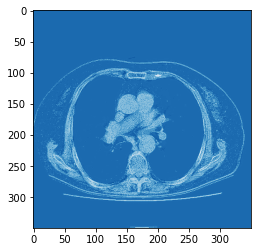

In [74]:
plt.imshow(resampled_list[0][200], cmap='Blues_r')

In [79]:
sample_sub

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,2000,100
1,ID00421637202311550012437_-12,2000,100
2,ID00422637202311677017371_-12,2000,100
3,ID00423637202312137826377_-12,2000,100
4,ID00426637202313170790466_-12,2000,100
...,...,...,...
725,ID00419637202311204720264_133,2000,100
726,ID00421637202311550012437_133,2000,100
727,ID00422637202311677017371_133,2000,100
728,ID00423637202312137826377_133,2000,100


In [80]:
sample_sub['Patient_Week'].apply(lambda x: x.split('_'))

0      [ID00419637202311204720264, -12]
1      [ID00421637202311550012437, -12]
2      [ID00422637202311677017371, -12]
3      [ID00423637202312137826377, -12]
4      [ID00426637202313170790466, -12]
                     ...               
725    [ID00419637202311204720264, 133]
726    [ID00421637202311550012437, 133]
727    [ID00422637202311677017371, 133]
728    [ID00423637202312137826377, 133]
729    [ID00426637202313170790466, 133]
Name: Patient_Week, Length: 730, dtype: object

In [82]:
sample_sub['Patient'] = sample_sub['Patient_Week'].apply(lambda x: x.split('_')[0])
sample_sub['Weeks'] = sample_sub['Patient_Week'].apply(lambda x: x.split('_')[-1])

In [84]:
sample_sub.head(2)

,Patient_Week,FVC,Confidence,Patient,Weeks
0,ID00419637202311204720264_-12,2000,100,ID00419637202311204720264,-12
1,ID00421637202311550012437_-12,2000,100,ID00421637202311550012437,-12


In [85]:
sample_sub = sample_sub[['Patient', 'Weeks', 'FVC', 'Confidence']]
sample_sub.head(2)

,Patient,Weeks,FVC,Confidence
0,ID00419637202311204720264,-12,2000,100
1,ID00421637202311550012437,-12,2000,100


In [88]:
test_df.head(2)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker


In [91]:
sample_sub

,Patient,Weeks,FVC,Confidence
0,ID00419637202311204720264,-12,2000,100
1,ID00421637202311550012437,-12,2000,100
2,ID00422637202311677017371,-12,2000,100
3,ID00423637202312137826377,-12,2000,100
4,ID00426637202313170790466,-12,2000,100
...,...,...,...,...
725,ID00419637202311204720264,133,2000,100
726,ID00421637202311550012437,133,2000,100
727,ID00422637202311677017371,133,2000,100
728,ID00423637202312137826377,133,2000,100


In [92]:
sample_sub.merge(test_df.drop('Weeks', axis=1), on='Patient')

,Patient,Weeks,FVC_x,Confidence,FVC_y,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,-12,2000,100,3020,70.186855,73,Male,Ex-smoker
1,ID00419637202311204720264,-11,2000,100,3020,70.186855,73,Male,Ex-smoker
2,ID00419637202311204720264,-10,2000,100,3020,70.186855,73,Male,Ex-smoker
3,ID00419637202311204720264,-9,2000,100,3020,70.186855,73,Male,Ex-smoker
4,ID00419637202311204720264,-8,2000,100,3020,70.186855,73,Male,Ex-smoker
...,...,...,...,...,...,...,...,...,...
725,ID00426637202313170790466,129,2000,100,2925,71.824968,73,Male,Never smoked
726,ID00426637202313170790466,130,2000,100,2925,71.824968,73,Male,Never smoked
727,ID00426637202313170790466,131,2000,100,2925,71.824968,73,Male,Never smoked
728,ID00426637202313170790466,132,2000,100,2925,71.824968,73,Male,Never smoked


In [95]:
sample_sub['Patient'].unique()

array(['ID00419637202311204720264', 'ID00421637202311550012437',
       'ID00422637202311677017371', 'ID00423637202312137826377',
       'ID00426637202313170790466'], dtype=object)